In [1]:
import warnings
warnings.filterwarnings(action='ignore')
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'RIDIBatang'
plt.rcParams['font.size'] = 10
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error  
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

***
지역적 선형 임베딩 (Locally Linear Embedding, LLE)
***
각 데이터 포인트의 이웃 데이터 중 k개의 이웃 데이터를 선정하고 데이터 자신과 k개의 이웃 데이터를 하나의 덩어리로 가정하고 데이터를 재구성한다.  
기존 데이터 자신의 이웃 데이터를 기준을 재구성하는 방법으로 해당 데이터 자체보다 주변의 이웃 데이터들이 중요하다. 

***
다른 차원 축소 방법과 비교하기 위해 와인 데이터를 이용한다.
***

In [2]:
# 데이터 불러오기
raw_data = datasets.load_wine() # 사이킷런이 제공하는 와인 데이터를 불러온다.

# 피쳐, 레이블 데이터 저장
xData = raw_data.data # 피쳐 데이터를 저장한다.
yData = raw_data.target # 피쳐 데이터에 따른 레이블을 저장한다.
print(xData.shape, yData.shape)

# 학습 데이터와 테스트 데이터로 분할
x_train, x_test, y_train, y_test = train_test_split(xData, yData, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

# 데이터 표준화
std_scale = StandardScaler() # 표준화 스케일러 객체를 만든다.
x_train = std_scale.fit_transform(x_train) # 학습 데이터를 스케일러로 표준화하고 적용한다.
x_test = std_scale.transform(x_test) # 테스트 데이터를 학습 데이터로 표준화된 스케일러에 적용한다.


(178, 13) (178,)
(133, 13) (45, 13) (133,) (45,)


***
지역적 선형 임베딩을 통한 차원 축소
***

In [3]:
from sklearn.manifold import LocallyLinearEmbedding # 지역적 선형 임베딩 알고리즘 사용
# n_components 속성의 기본값은 2이고, 축소할 차원이 크기를 지정해 지역적 선형 임베딩 모델 객체를 만든다.
lle = LocallyLinearEmbedding(n_components=2)

#lle.fit(x_train, y_train) # 학습 데이터와 학습 데이터의 레이블로 지역적 선형 임베딩 분석 모델 학습, 지역적 선형 임베딩 알고리즘은 지도 학습이므로 레이블;답이 필요함.
#x_train_lle = lle.transform(x_train)# 학습된 지역적 선형 임베딩 모델에 학습 데이터를 적용
x_train_lle = lle.fit_transform(x_train, y_train)

# 학습은 학습 데이터로만 해야하고 테스트 데이터는 학습 데이터로 학습된 결과에 적용만 시킨다.
x_test_lle = lle.transform(x_test)

# 차원 축소 이전 데이터의 차원을 확인하면 차원 축소 전의 피쳐 데이터는 13차원의 데이터 133개로 구성되어 있음을 알 수 있고, 
# 주성분 분석을 이용, 차원 축소한 데이터는 2차원의 데이터 133개로 구성되어 있음을 알 수 있다. 
print(x_train_lle.shape, x_test_lle.shape) # ::before (133, 13) (45, 13) -> ::after (133, 2) (45, 2)

(133, 2) (45, 2)


In [4]:
# 지역적 선형 임베딩 벡터 확인
# embedding_속성으로 지역적 선형 임베딩 벡터를 확인할 수 있다.
print(lle.embedding_)

[[ 0.10370077  0.03797149]
 [ 0.07222626  0.00764776]
 [ 0.11291288  0.05930921]
 [ 0.11560401  0.06205209]
 [ 0.11854756  0.06719633]
 [-0.02664269 -0.13181186]
 [-0.10501921  0.07537654]
 [-0.10326081  0.07047313]
 [ 0.10811266  0.04689056]
 [-0.04377827 -0.09418701]
 [ 0.0712414   0.01801874]
 [ 0.13033709  0.08810276]
 [ 0.02991311 -0.04069974]
 [-0.07898669  0.01497572]
 [ 0.03473125 -0.05744147]
 [ 0.01943026 -0.04529514]
 [ 0.11959649  0.07007802]
 [-0.10317351  0.07114343]
 [-0.02752016 -0.14962908]
 [-0.1164511   0.10200801]
 [ 0.10508563  0.04186687]
 [-0.01462819 -0.16313682]
 [ 0.06810266 -0.0169578 ]
 [-0.01732533 -0.16242923]
 [ 0.11454199  0.05901053]
 [-0.09625792  0.05485706]
 [-0.11013016  0.08772677]
 [-0.10843424  0.08356562]
 [-0.10619192  0.07755468]
 [-0.08729218  0.04167607]
 [-0.03682447 -0.05761368]
 [ 0.09367018  0.02624216]
 [-0.10295085  0.06762962]
 [ 0.11999055  0.07023365]
 [-0.06361883 -0.0199435 ]
 [-0.11550832  0.09903396]
 [ 0.11279934  0.05534145]
 

***
지역적 선형 임베딩을 통해 차원 축소된 데이터 시각화
***

In [5]:
# 차원 축소한 데이터 시각화를 위해 데이터 프레임을 만든다.
x_train_df = pd.DataFrame(x_train_lle, columns=['lle_comp1', 'lle_comp2'])
x_train_df["label"] = y_train
x_train_df

,lle_comp1,lle_comp2,label
0,0.103701,0.037971,0
1,0.072226,0.007648,1
2,0.112913,0.059309,0
3,0.115604,0.062052,0
4,0.118548,0.067196,0
...,...,...,...
128,-0.122468,0.117589,2
129,-0.106745,0.077409,2
130,0.001631,-0.119052,1
131,-0.111992,0.091476,2


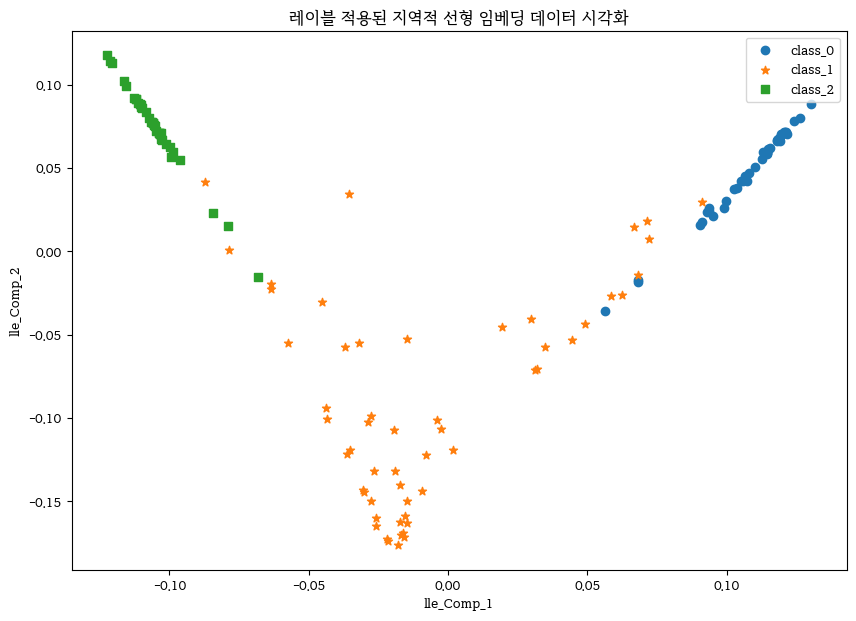

In [6]:
# 위 셀의 시각화 코드를 반복문을 사용해서 만든다.
plt.figure(figsize=[10, 7])
markers = ["o", "*", "s"]

for index, marker in enumerate(markers):
     df_index = x_train_df[x_train_df.label == index] # 레이블 별로 데이터를 분할한다.
     x = df_index.lle_comp1 # 레이블 별로 분할된 데이터에 첫번째 주성분 벡터를 추출한다.
     y = df_index.lle_comp2 # 레이블 별로 분할된 데이터에 두번째 주성분 벡터를 추출한다.
     label = raw_data.target_names[index] # 레이블 이름을 지정한다.
     plt.scatter(x=x, y=y, marker=marker, label= label ) # 산포도를 그린다.

plt.title("레이블 적용된 지역적 선형 임베딩 데이터 시각화")
plt.xlabel("lle_Comp_1")
plt.ylabel("lle_Comp_2")
plt.legend()
plt.show()

***
지역적 선형 임베딩 적용 전 데이터 학습 x_train
***

In [7]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=4, random_state=0) # 랜덤 포레스트 모델 객체 생성
rfc.fit(x_train, y_train) # 학습
predict = rfc.predict(x_test) #예측
#print(predict)
confusion_matrix(y_test, predict) #혼동행렬

array([[18,  0,  0],
       [ 1, 16,  0],
       [ 0,  0, 10]], dtype=int64)

In [8]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.94      0.97        17
           2       1.00      1.00      1.00        10

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



***
선형 판별 분석 적용 후 데이터 학습 x_train_lle
***

In [9]:
rfc.fit(x_train_lle, y_train) # 학습된 랜덤 포레스트 모델에 테스트 데이터를 넣어서 학습 학습
predict = rfc.predict(x_test_lle) #예측
#print(predict)
confusion_matrix(y_test, predict) #혼동행렬

array([[16,  2,  0],
       [ 1, 16,  0],
       [ 0,  0, 10]], dtype=int64)

In [10]:
print(classification_report(y_test, predict)) # 분류 리포트

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.89      0.94      0.91        17
           2       1.00      1.00      1.00        10

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45

